# Recoding the course material

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
import time
import random
original_prce = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
price = defaultdict(int)
for i, p in enumerate(original_prce):
    price[i+1] = p
assert price[1] == 1

In [2]:
# Good features about defaultdict
price[111]

0

In [3]:
solution = {}

In [4]:
## Decorator

In [5]:
def func_1(n):
    for i in range(n):
        print (n)

In [6]:
#脚手架程序
def call_time(func_1, arg):
    start = time.time()
    func_1(arg)
    print ('used time: {}'.format(time.time() - start))

In [7]:
call_time(func_1,10)

10
10
10
10
10
10
10
10
10
10
used time: 0.0005791187286376953


In [8]:
from functools import wraps

In [9]:
function_called_time = defaultdict(int)

def get_call_time(func):
    def _inner(arg):
        global function_called_time
        function_called_time[func.__name__] += 1 
        result = func(arg)
        print('function called time is : {}'.format(function_called_time[func.__name__]))
        return result
    return _inner

In [10]:
@get_call_time
def func_1(n):
    for i in range(n):
        print (i)

In [11]:
func_1(10)

0
1
2
3
4
5
6
7
8
9
function called time is : 1


In [12]:
@get_call_time
def func_slow(n):
    for i in range(n):
        time.sleep(0.2)
        print (i)

In [13]:
func_slow(10)

0
1
2
3
4
5
6
7
8
9
function called time is : 1


In [14]:
def memo(func):
    cache = {}
    def _wrap(n):
        if n in cache: 
            result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap

In [15]:
@memo
def r(n):
    max_price, split_point = max(
    [(price[n],0)] +[(r(i) +r(n-i),i) for i in range(1,n)], key = lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    return max_price

In [16]:
r(231)

691

In [47]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [18]:
def not_cut(split):
    return split == 0

def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    if not_cut(left):
        return [right]
    return parse_solution(left,revenue_solution) + parse_solution(right, revenue_solution)

In [19]:
parse_solution(17,solution)

[1, 6, 10]

In [20]:
from functools import lru_cache

In [21]:
@lru_cache(maxsize = 2 ** 10)
def edit_distance_raw(string1, string2):
    if len(string1) == 0:
        return len(string2)
    if len(string2) == 0:
        return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    return min(
    edit_distance_raw(string1[:-1], string2) + 1,
    edit_distance_raw(string1, string2[:-1]) + 1,
    edit_distance_raw(string1[:-1], string2[:-1]) + (0 if tail_s1 == tail_s2 else 2)
    ) 

In [22]:
edit_distance_raw('abcde','abcd')

1

# Finish the Solution Parse Part of Edit-Distance

In [170]:
@lru_cache(maxsize = 2 ** 10)
def edit_distance(string1, string2):
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, ((string1[:-1], string2),'We let {} DEL {} to get to this stage'.format(string1, tail_s1))),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, ((string1, string2[:-1]),'We let {} ADD {} to get to this stage'.format(string1, tail_s2)))]  # string 1 add tail of string2

    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, ((string1[:-1], string2[:-1]),'Just moving the last character for both strings'))
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 2, ((string1[:-1], string2[:-1]),'We SUB {} => {} to get to this stage'.format(tail_s1, tail_s2)))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution2[(string1, string2)] = operation 
    
    return min_distance

In [171]:
def parse_solution(two_string, solution, result):
    char, procedure = solution[two_string]
    if char[0] == '' or char[1] == '':# one of the string has became empty
        return result.append([char,procedure])
    result.append([char,procedure])
    parse_solution(char,solution, result)
    return result

In [172]:
solution2 = {}

In [173]:
edit_distance('beijing','abiejinnn')

6

In [174]:
parse_solution(('beijing','abiejinnn'),solution2, [('beijing','abiejinnn')])

[('beijing', 'abiejinnn'),
 [('beijin', 'abiejinnn'), 'We let beijing DEL g to get to this stage'],
 [('beijin', 'abiejinn'), 'We let beijin ADD n to get to this stage'],
 [('beijin', 'abiejin'), 'We let beijin ADD n to get to this stage'],
 [('beiji', 'abieji'), 'Just moving the last character for both strings'],
 [('beij', 'abiej'), 'Just moving the last character for both strings'],
 [('bei', 'abie'), 'Just moving the last character for both strings'],
 [('be', 'abie'), 'We let bei DEL i to get to this stage'],
 [('b', 'abi'), 'Just moving the last character for both strings'],
 [('b', 'ab'), 'We let b ADD i to get to this stage'],
 [('', 'a'), 'Just moving the last character for both strings']]

# Answer following questions

1.Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problem?

Ans: 当子问题有大量重复的时候，我们可以选择动态规划，将子问题进行存储，并通过递归反复调用进行计算。
传统问题没有这么大的重复性子任务

2.Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?

Ans:机器学习不一定能解决所有的问题，不能过分迷信

3.Can you catch up at least 3 problems which could solved by Dynamic Programming?

Ans:瓷砖切割，最优路线规划，字符串相似度距离分析

4.Can you catch up at least 3 problems wich could sloved by Edit Distance?


Ans: 语音识别，拼写输入，文章查重

5.Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.


Ans:

(1)分析出来子问题的重复，哪些问题是不断重复的

(2)子问题存储（装饰器），通过存储子问题的结果，快速查询，得到答案

(3)构建Solution, 将我们得到的结果解析出来， 使其具有可读性

6.What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)


Ans:

(1) 没有统一的标准模型；


(2) 数值方法求解时存在维数灾。

# Preparation of Project-01

(OPTIONAL):给定一个初始点 $P$, 已知 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

In [179]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitudes = [random.randint(-100, 100) for _ in range(20)]

In [183]:
chosen_p = (5, 10)

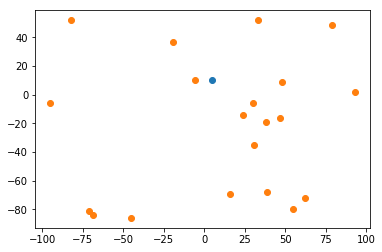

In [184]:
plt.scatter(chosen_p[0],chosen_p[1])
plt.scatter(latitudes, longitudes)

In [1]:
##完全没有思路。。
